In [3]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchmetrics
from torchmetrics.functional import accuracy
import lightning.pytorch as pl
from pytorch_lightning import Trainer
from torchinfo import summary
from torchview import draw_graph
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.datasets import CIFAR10
import torch
from torch import nn
import pytorch_lightning as pl

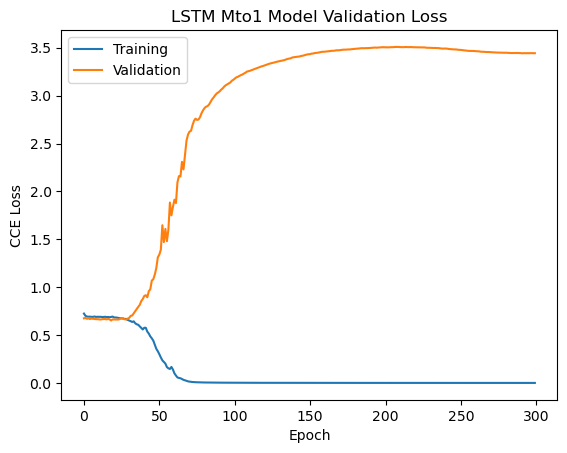

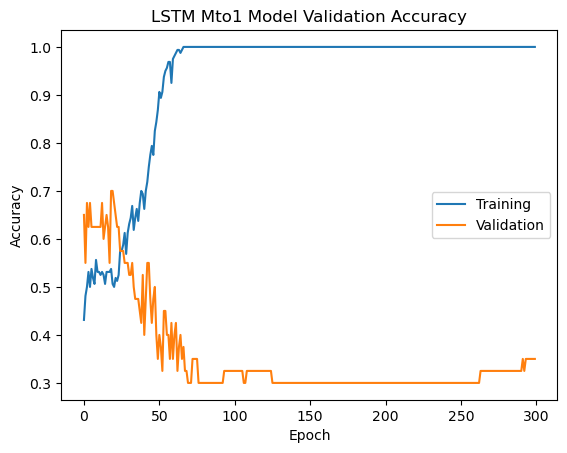

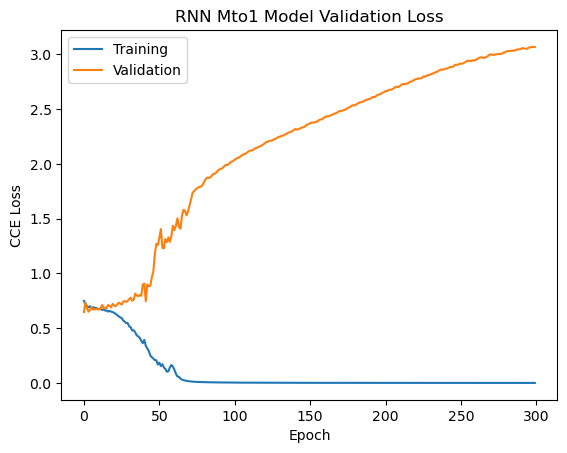

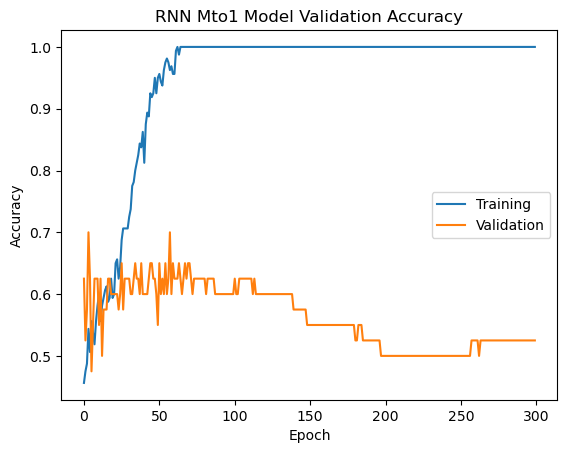

In [10]:
lstm_Mto1_Results = pd.read_csv("logs/lstm_Mto1_Results/version_0/metrics.csv", delimiter=',')
plt.plot(lstm_Mto1_Results["epoch"][np.logical_not(np.isnan(lstm_Mto1_Results["train_loss"]))],
         lstm_Mto1_Results["train_loss"][np.logical_not(np.isnan(lstm_Mto1_Results["train_loss"]))],
         label="Training")
plt.plot(lstm_Mto1_Results["epoch"][np.logical_not(np.isnan(lstm_Mto1_Results["val_loss"]))],
         lstm_Mto1_Results["val_loss"][np.logical_not(np.isnan(lstm_Mto1_Results["val_loss"]))],
         label="Validation")
plt.legend()
plt.ylabel("CCE Loss")
plt.xlabel("Epoch")
plt.title("LSTM Mto1 Model Validation Loss")
plt.show()

plt.plot(lstm_Mto1_Results["epoch"][np.logical_not(np.isnan(lstm_Mto1_Results["train_acc"]))],
         lstm_Mto1_Results["train_acc"][np.logical_not(np.isnan(lstm_Mto1_Results["train_acc"]))],
         label="Training")
plt.plot(lstm_Mto1_Results["epoch"][np.logical_not(np.isnan(lstm_Mto1_Results["val_acc"]))],
         lstm_Mto1_Results["val_acc"][np.logical_not(np.isnan(lstm_Mto1_Results["val_acc"]))],
         label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("LSTM Mto1 Model Validation Accuracy")
plt.show()

rnn_Mto1_Results = pd.read_csv("logs/rnn_Mto1_Results/version_0/metrics.csv", delimiter=',')
plt.plot(rnn_Mto1_Results["epoch"][np.logical_not(np.isnan(rnn_Mto1_Results["train_loss"]))],
         rnn_Mto1_Results["train_loss"][np.logical_not(np.isnan(rnn_Mto1_Results["train_loss"]))],
         label="Training")
plt.plot(rnn_Mto1_Results["epoch"][np.logical_not(np.isnan(rnn_Mto1_Results["val_loss"]))],
         rnn_Mto1_Results["val_loss"][np.logical_not(np.isnan(rnn_Mto1_Results["val_loss"]))],
         label="Validation")
plt.legend()
plt.ylabel("CCE Loss")
plt.xlabel("Epoch")
plt.title("RNN Mto1 Model Validation Loss")
plt.show()

plt.plot(rnn_Mto1_Results["epoch"][np.logical_not(np.isnan(rnn_Mto1_Results["train_acc"]))],
         rnn_Mto1_Results["train_acc"][np.logical_not(np.isnan(rnn_Mto1_Results["train_acc"]))],
         label="Training")
plt.plot(rnn_Mto1_Results["epoch"][np.logical_not(np.isnan(rnn_Mto1_Results["val_acc"]))],
         rnn_Mto1_Results["val_acc"][np.logical_not(np.isnan(rnn_Mto1_Results["val_acc"]))],
         label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("RNN Mto1 Model Validation Accuracy")
plt.show()

The LSTM Mto1 Model was able to learn extremely rapidly before a plateau, its accuracy ended being only about .35 which is very poor on a parity problem. The RNN Mto1 Model performed roughly 20% more accurately. Due to the simplicity of the task, the RNN model is probably better suited for the task since the LSTM model is better equipped for more complex datasets. 

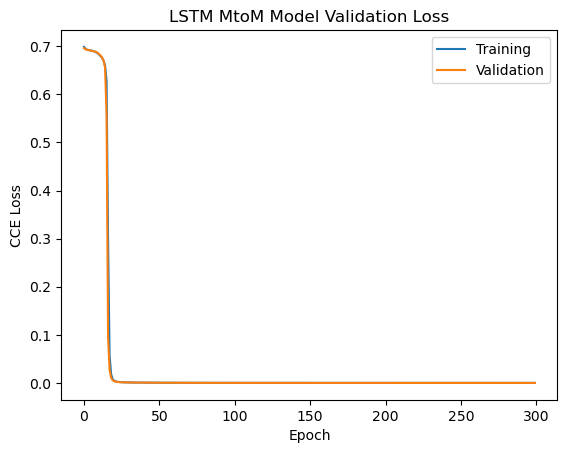

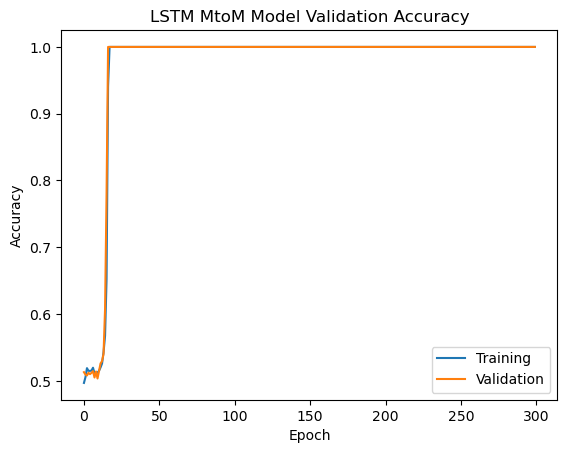

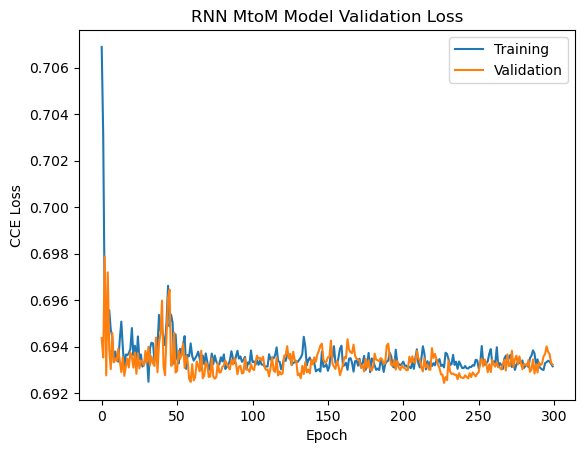

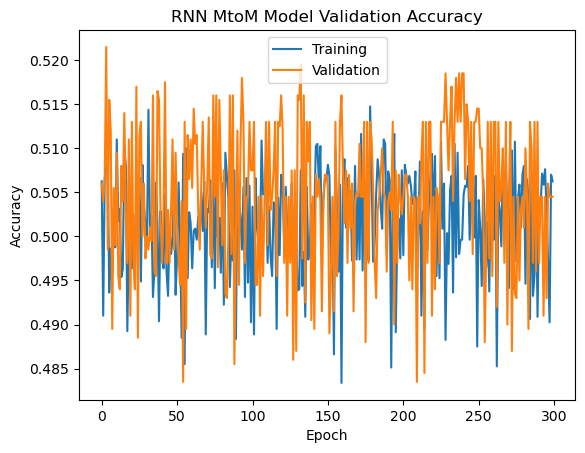

In [9]:
lstm_MtoM_Results = pd.read_csv("logs/lstm_MtoM_Results/version_0/metrics.csv", delimiter=',')
plt.plot(lstm_MtoM_Results["epoch"][np.logical_not(np.isnan(lstm_MtoM_Results["train_loss"]))],
         lstm_MtoM_Results["train_loss"][np.logical_not(np.isnan(lstm_MtoM_Results["train_loss"]))],
         label="Training")
plt.plot(lstm_MtoM_Results["epoch"][np.logical_not(np.isnan(lstm_MtoM_Results["val_loss"]))],
         lstm_MtoM_Results["val_loss"][np.logical_not(np.isnan(lstm_MtoM_Results["val_loss"]))],
         label="Validation")
plt.legend()
plt.ylabel("CCE Loss")
plt.xlabel("Epoch")
plt.title("LSTM MtoM Model Validation Loss")
plt.show()

plt.plot(lstm_MtoM_Results["epoch"][np.logical_not(np.isnan(lstm_MtoM_Results["train_acc"]))],
         lstm_MtoM_Results["train_acc"][np.logical_not(np.isnan(lstm_MtoM_Results["train_acc"]))],
         label="Training")
plt.plot(lstm_MtoM_Results["epoch"][np.logical_not(np.isnan(lstm_MtoM_Results["val_acc"]))],
         lstm_MtoM_Results["val_acc"][np.logical_not(np.isnan(lstm_MtoM_Results["val_acc"]))],
         label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("LSTM MtoM Model Validation Accuracy")
plt.show()
rnn_MtoM_Results = pd.read_csv("logs/rnn_MtoM_Results/version_2/metrics.csv", delimiter=',')
plt.plot(rnn_MtoM_Results["epoch"][np.logical_not(np.isnan(rnn_MtoM_Results["train_loss"]))],
         rnn_MtoM_Results["train_loss"][np.logical_not(np.isnan(rnn_MtoM_Results["train_loss"]))],
         label="Training")
plt.plot(rnn_MtoM_Results["epoch"][np.logical_not(np.isnan(rnn_MtoM_Results["val_loss"]))],
         rnn_MtoM_Results["val_loss"][np.logical_not(np.isnan(rnn_MtoM_Results["val_loss"]))],
         label="Validation")
plt.legend()
plt.ylabel("CCE Loss")
plt.xlabel("Epoch")
plt.title("RNN MtoM Model Validation Loss")
plt.show()

plt.plot(rnn_MtoM_Results["epoch"][np.logical_not(np.isnan(rnn_MtoM_Results["train_acc"]))],
         rnn_MtoM_Results["train_acc"][np.logical_not(np.isnan(rnn_MtoM_Results["train_acc"]))],
         label="Training")
plt.plot(rnn_MtoM_Results["epoch"][np.logical_not(np.isnan(rnn_MtoM_Results["val_acc"]))],
         rnn_MtoM_Results["val_acc"][np.logical_not(np.isnan(rnn_MtoM_Results["val_acc"]))],
         label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("RNN MtoM Model Validation Accuracy")
plt.show()

With this example the LSTM model is near perfect, sharply learning and plateauing by epoch 15 or so. The RNN model on the otherhand does not appear to make any change throughout its training and validation processes. The RNN is probably struggling more with the complexity of the task in comparison to the LSTM model. It Floats around .5 which means it wasn't learning anything, that's just the pure chance probabilities. 